# Frequentist Models

This notebook evaluates the performance of some frequentist models for wealth. We ignore time effects / exogenous regressors. The tested distributions are:
- Pareto
- Weibull
- Generalised Pareto

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Self-made modules
from thesis_tools.utils.data import *
from thesis_tools.utils.latex import *
from thesis_tools.models.frequentist import *
from thesis_tools.statistical_tests.tests import *

## Estimation

In [4]:
df = read_billionaires_data()
years = df['year'].unique()
sub_regions = df['sub_region'].unique()
sub_regions = sub_regions[sub_regions != 'Not a sub-region']

In [5]:
parameter_estimates = {}
for year in years:
    for sub_region in sub_regions:
        billionaires = df[(df['year'] == year) & (df['sub_region'] == sub_region)]
        n_billionaires = len(billionaires)
        if n_billionaires <= 64:
            continue
        mean_wealth = billionaires['net_worth'].mean()
        mean_log_wealth = billionaires['log_net_worth'].mean()
        data = billionaires['net_worth']
        
        # Estimate a Pareto
        pareto = Pareto()
        alpha_pareto, _ = pareto.fit(data=data)
        
        # Estimate a Weibull
        weibull = Weibull()
        gamma_weibull, alpha_weibull = weibull.fit(data=data)

        # Estimate a Generalised Pareto
        generalised_pareto = GeneralisedPareto()
        gamma_generalised_pareto_MLE, sigma_generalised_pareto_MLE, _ = generalised_pareto.fit(data=data)
        gamma_generalised_pareto_Hill, sigma_generalised_pareto_Hill, _ = generalised_pareto.fit_hill(data=data)

        parameter_estimates[(year, sub_region)] = {
            'n_billionaires': n_billionaires,
            'mean_wealth': mean_wealth,
            'mean_log_wealth': mean_log_wealth,
            'alpha_pareto': alpha_pareto,
            'gamma_weibull': gamma_weibull,
            'alpha_weibull': alpha_weibull,
            'gamma_generalised_pareto_MLE': gamma_generalised_pareto_MLE,
            'sigma_generalised_pareto_MLE': sigma_generalised_pareto_MLE,
            'gamma_generalised_pareto_Hill': gamma_generalised_pareto_Hill,
            'sigma_generalised_pareto_Hill': sigma_generalised_pareto_Hill
        }
        
parameter_estimates_df = pd.DataFrame(parameter_estimates).T

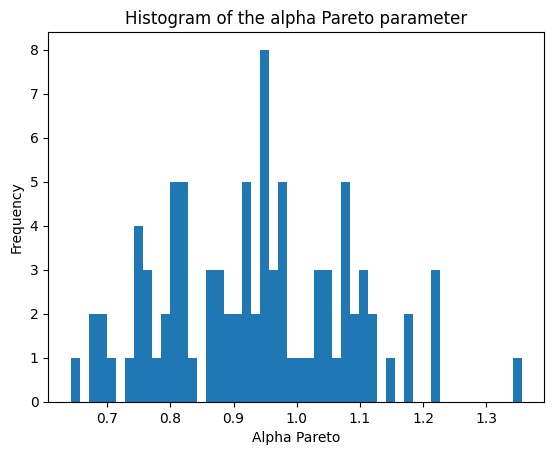

In [6]:
# Histogram of the alpha Pareto parameter
plt.hist(parameter_estimates_df['alpha_pareto'], bins=50)
plt.xlabel('Alpha Pareto')
plt.ylabel('Frequency')
plt.title('Histogram of the alpha Pareto parameter')
plt.show()

In [7]:
# fit a gamma distribution to the alpha Pareto parameter
shape, loc, scale = scipy.stats.gamma.fit(parameter_estimates_df['alpha_pareto'], floc=0)
scale = 1/scale
shape, scale

(41.11631046521622, 43.96812881825347)

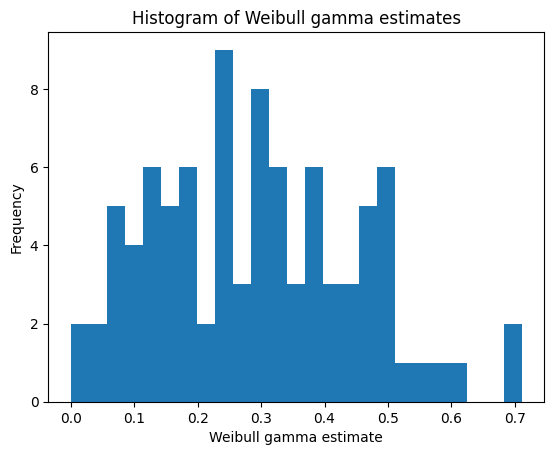

Mean Weibull gamma estimate: 0.2910877810152911
Median Weibull gamma estimate: 0.2919932068092991


In [8]:
# Histogram of the Weibull gamma estimates
plt.hist(parameter_estimates_df['gamma_weibull'], bins=25)
plt.xlabel('Weibull gamma estimate')
plt.ylabel('Frequency')
plt.title('Histogram of Weibull gamma estimates')
plt.show()
# Print the mean and median of the Weibull gamma estimates
mean_gamma_weibull = parameter_estimates_df['gamma_weibull'].mean()
median_gamma_weibull = parameter_estimates_df['gamma_weibull'].median()
print('Mean Weibull gamma estimate:', mean_gamma_weibull)
print('Median Weibull gamma estimate:', median_gamma_weibull)

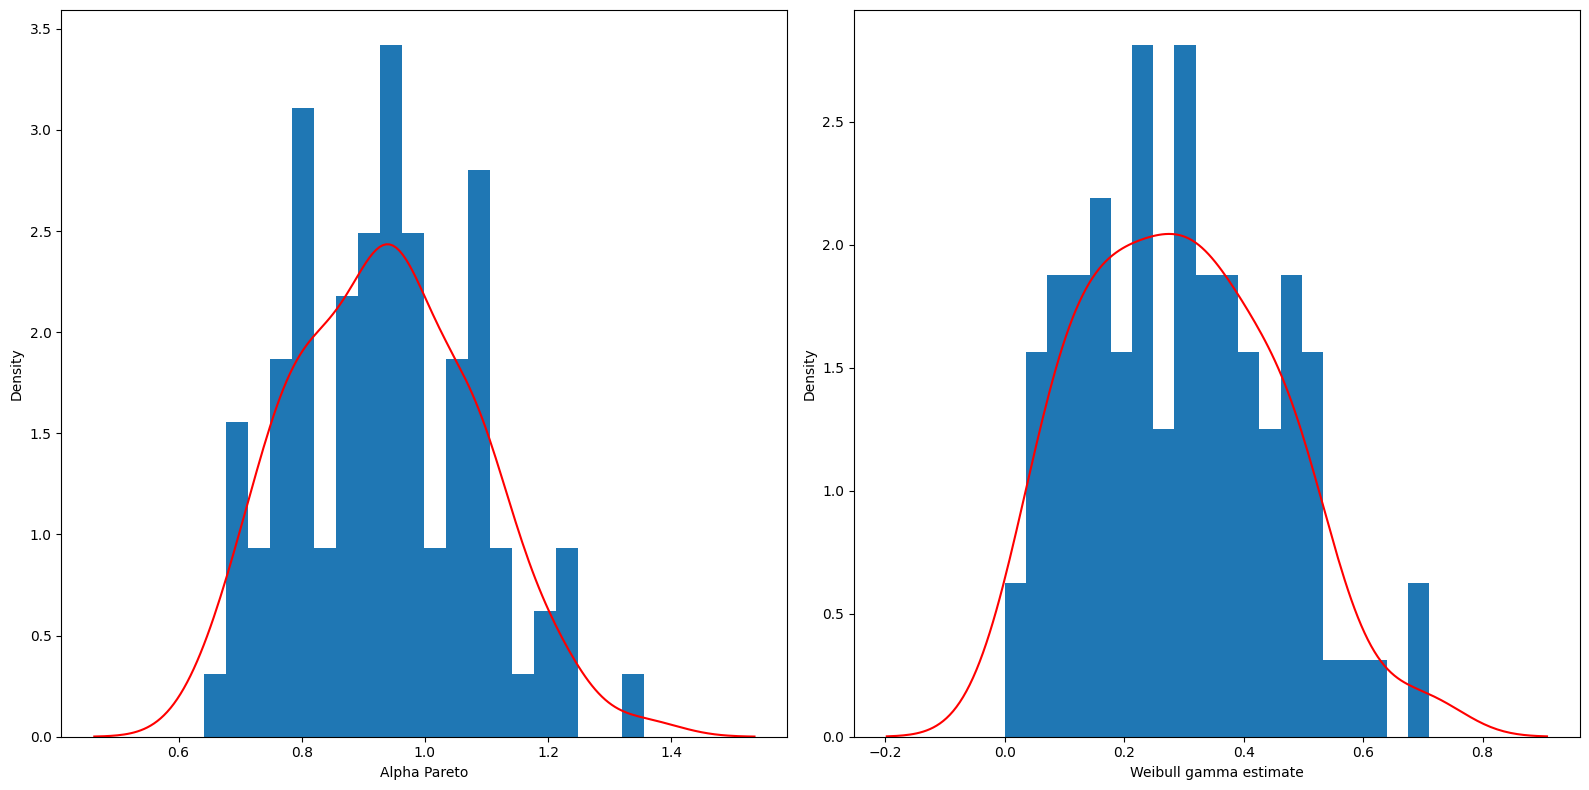

In [9]:
# Join the histogram plots of the Pareto alpha and Weibull gamma estimates
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].hist(parameter_estimates_df['alpha_pareto'], bins=20, density=True)
sns.kdeplot(parameter_estimates_df['alpha_pareto'], ax=ax[0], color='red')
ax[0].set_xlabel('Alpha Pareto')
ax[0].set_ylabel('Density')
ax[1].hist(parameter_estimates_df['gamma_weibull'], bins=20, density=True)
sns.kdeplot(parameter_estimates_df['gamma_weibull'], ax=ax[1], color='red')
ax[1].set_xlabel('Weibull gamma estimate')
ax[1].set_ylabel('Density')
plt.tight_layout()
plt.show()


In [10]:
# fit a gamma distribution to the gamma weibull parameter
shape, loc, scale = scipy.stats.gamma.fit(parameter_estimates_df['gamma_weibull'], floc=0)
scale = 1/scale
shape, scale

(1.722311266494664, 5.9168105939980675)

In [11]:
# fit inverse gamma to the Weibull alpha estimates
shape, loc, scale = scipy.stats.invgamma.fit(parameter_estimates_df['alpha_weibull'], floc=0)
shape, scale

(12.364863863249372, 14.16795487097616)

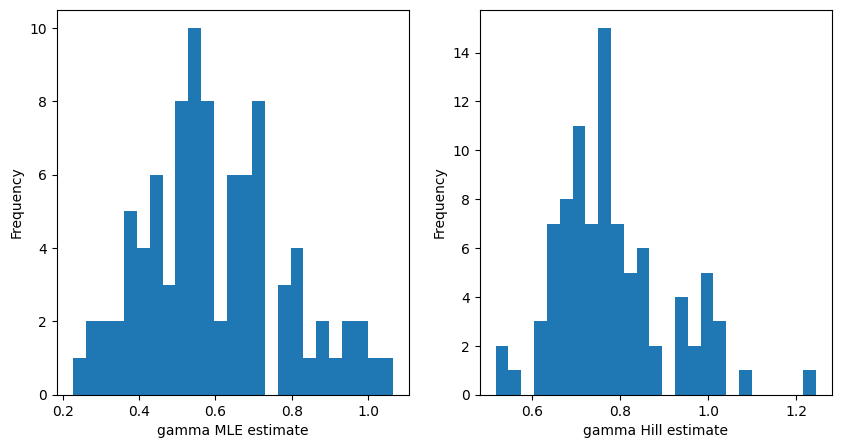

Mean Generalised Pareto gamma MLE estimate: 0.6001142624598925
Median Generalised Pareto gamma MLE estimate: 0.569418911073323
Mean Generalised Pareto gamma Hill estimate: 0.7816969944863078
Median Generalised Pareto gamma Hill estimate: 0.7647940252412713


In [12]:
# In 2 histograms, plot the MLE and Hill gamma estimates of the Generalised Pareto
fix, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(parameter_estimates_df['gamma_generalised_pareto_MLE'], bins=25)
ax[0].set_xlabel('gamma MLE estimate')
ax[0].set_ylabel('Frequency')
ax[1].hist(parameter_estimates_df['gamma_generalised_pareto_Hill'], bins=25)
ax[1].set_xlabel('gamma Hill estimate')
ax[1].set_ylabel('Frequency')
plt.show()
# Print the mean and median of the Generalised Pareto gamma estimates
mean_gamma_generalised_pareto_MLE = parameter_estimates_df['gamma_generalised_pareto_MLE'].mean()
median_gamma_generalised_pareto_MLE = parameter_estimates_df['gamma_generalised_pareto_MLE'].median()
mean_gamma_generalised_pareto_Hill = parameter_estimates_df['gamma_generalised_pareto_Hill'].mean()
median_gamma_generalised_pareto_Hill = parameter_estimates_df['gamma_generalised_pareto_Hill'].median()
print('Mean Generalised Pareto gamma MLE estimate:', mean_gamma_generalised_pareto_MLE)
print('Median Generalised Pareto gamma MLE estimate:', median_gamma_generalised_pareto_MLE)
print('Mean Generalised Pareto gamma Hill estimate:', mean_gamma_generalised_pareto_Hill)
print('Median Generalised Pareto gamma Hill estimate:', median_gamma_generalised_pareto_Hill)


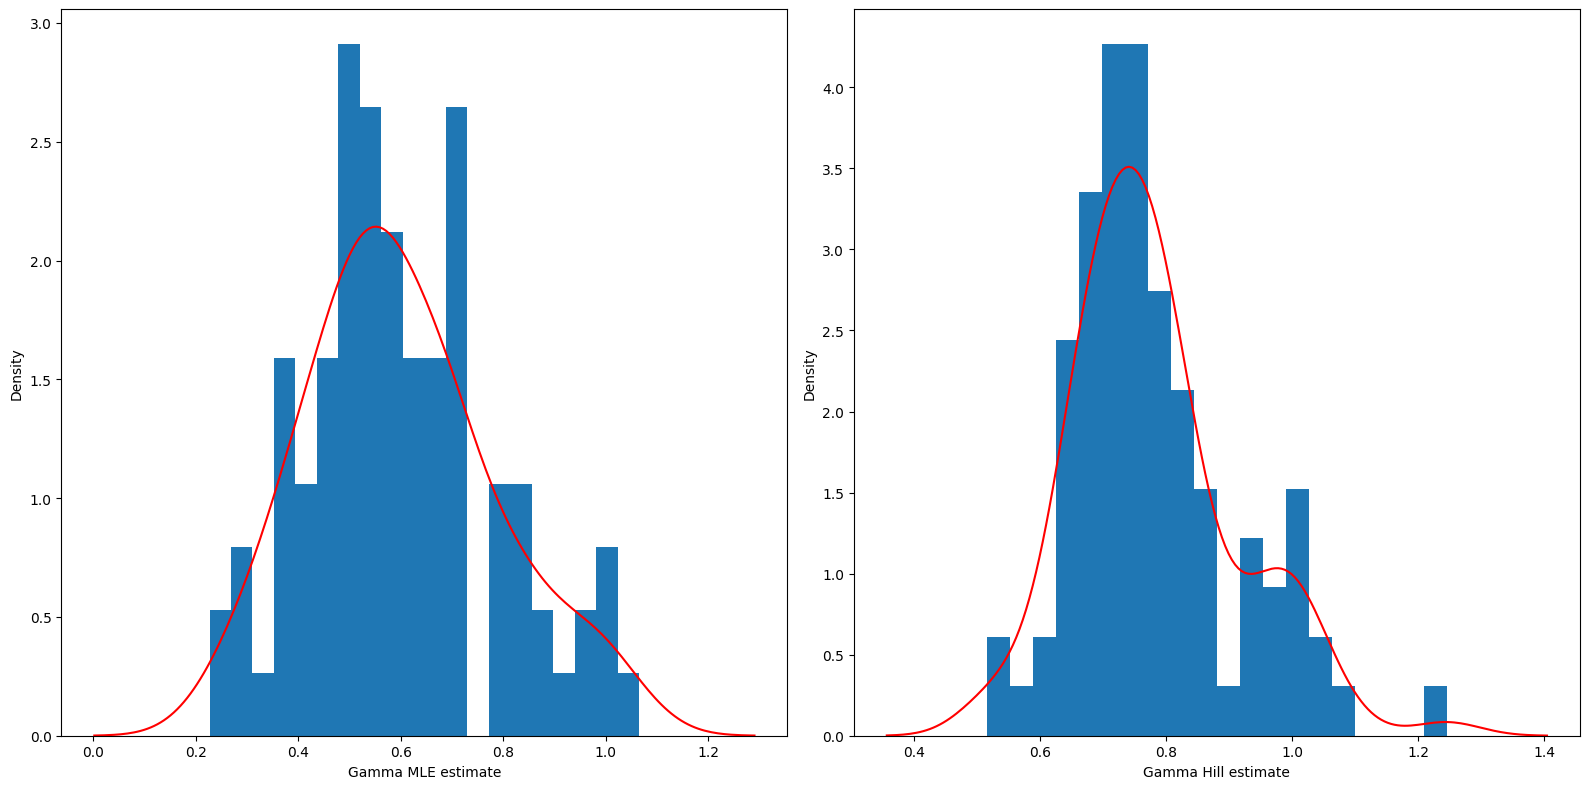

In [13]:
# Make a merged plot of the gamma estimates of the Generalised Pareto with MLE and Hill
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].hist(parameter_estimates_df['gamma_generalised_pareto_MLE'], bins=20, density=True)
sns.kdeplot(parameter_estimates_df['gamma_generalised_pareto_MLE'], ax=ax[0], color='red')
ax[0].set_xlabel('Gamma MLE estimate')
ax[0].set_ylabel('Density')
ax[1].hist(parameter_estimates_df['gamma_generalised_pareto_Hill'], bins=20, density=True)
sns.kdeplot(parameter_estimates_df['gamma_generalised_pareto_Hill'], ax=ax[1], color='red')
ax[1].set_xlabel('Gamma Hill estimate')
ax[1].set_ylabel('Density')
plt.tight_layout()
plt.show()


In [14]:
# fit gamma to the MLE gamma estimates
gamma_mle_estimates = parameter_estimates_df['gamma_generalised_pareto_MLE']
gamma_mle_estimates = gamma_mle_estimates + 0.5
shape, loc, scale = scipy.stats.gamma.fit(gamma_mle_estimates, floc=0)
shape, 1/scale

(36.562278452057065, 33.23498267380206)

In [15]:
# fit gamma to the MLE sigma estimates
sigma_mle_estimates = parameter_estimates_df['sigma_generalised_pareto_MLE']
shape, loc, scale = scipy.stats.gamma.fit(sigma_mle_estimates, floc=0)
shape, 1/scale

(7.914972385007113, 5.922607931560686)

The following can be concluded from the initial estimation:

- For Weibull, it is quite easy to choose a single gamma parameter across all samples
- In general, it seems more convenient to choose the median MLE estimate for the GPD
- The Hill estimates are generally higher than the MLE estimates
- Problem with Hill estimates - requires human judgement for the Hill plot

We now re-estimate the scale parameters only for all sub-region / year pairs, with fixed pre-determined shape parameters.

In [16]:
pre_determined_Weibull_gamma = median_gamma_weibull
pre_determined_GeneralisedPareto_gamma = median_gamma_generalised_pareto_MLE

In [59]:
parameter_estimates = {}
for year in years:
    for sub_region in sub_regions:
        billionaires = df[(df['year'] == year) & (df['sub_region'] == sub_region)]
        n_billionaires = len(billionaires)
        # set a lower limit on the number of billionaires
        if n_billionaires <= 64:
            continue
        mean_wealth = billionaires['net_worth'].mean()
        mean_log_wealth = billionaires['log_net_worth'].mean()
        data = billionaires['net_worth']
        
        # Estimate a Pareto
        pareto = Pareto()
        alpha_pareto, _ = pareto.fit(data=data)
        
        # Estimate a Weibull
        weibull = Weibull()
        gamma_weibull, alpha_weibull = weibull.fit(
            data=data, 
            given_gamma=pre_determined_Weibull_gamma
        )

        # Estimate a Generalised Pareto
        generalised_pareto = GeneralisedPareto()
        gamma_generalised_pareto, sigma_generalised_pareto, _ = generalised_pareto.fit(
            data=data, 
            given_gamma=pre_determined_GeneralisedPareto_gamma
        )

        parameter_estimates[(year, sub_region)] = {
            'n_billionaires': n_billionaires,
            'mean_wealth': mean_wealth,
            'mean_log_wealth': mean_log_wealth,
            'alpha_pareto': alpha_pareto,
            'gamma_weibull': gamma_weibull,
            'alpha_weibull': alpha_weibull,
            'gamma_generalised_pareto': gamma_generalised_pareto,
            'sigma_generalised_pareto': sigma_generalised_pareto
        }
        
parameter_estimates_df = pd.DataFrame(parameter_estimates).T

Gamma parameter set to: None using given_gamma to estimate alpha using Teulings & Toussaint (2023).
Gamma parameter set to: 0.569418911073323 using given_gamma.
Gamma parameter set to: None using given_gamma to estimate alpha using Teulings & Toussaint (2023).
Gamma parameter set to: 0.569418911073323 using given_gamma.
Gamma parameter set to: None using given_gamma to estimate alpha using Teulings & Toussaint (2023).
Gamma parameter set to: 0.569418911073323 using given_gamma.
Gamma parameter set to: None using given_gamma to estimate alpha using Teulings & Toussaint (2023).
Gamma parameter set to: 0.569418911073323 using given_gamma.
Gamma parameter set to: None using given_gamma to estimate alpha using Teulings & Toussaint (2023).
Gamma parameter set to: 0.569418911073323 using given_gamma.
Gamma parameter set to: None using given_gamma to estimate alpha using Teulings & Toussaint (2023).
Gamma parameter set to: 0.569418911073323 using given_gamma.
Gamma parameter set to: None using

## Evaluation

In [51]:
# For each sub-region, find some summary statistics of the estimated parameters
summary_statistics = {}
for sub_region in sub_regions:
    sub_region_df = parameter_estimates_df[parameter_estimates_df.index.get_level_values(1) == sub_region]
    summary_statistics[sub_region] = {
        'n_billionaires': sub_region_df['n_billionaires'].sum(),
        'n_years': sub_region_df.shape[0],
        'mean_wealth': sub_region_df['mean_wealth'].mean(),
        'mean_log_wealth': sub_region_df['mean_log_wealth'].mean(),
        'mean_alpha_pareto': sub_region_df['alpha_pareto'].mean(),
        'std_alpha_pareto': sub_region_df['alpha_pareto'].std(),
        'min_alpha_pareto': sub_region_df['alpha_pareto'].min(),
        'max_alpha_pareto': sub_region_df['alpha_pareto'].max(),
        'mean_alpha_weibull': sub_region_df['alpha_weibull'].mean(),
        'std_alpha_weibull': sub_region_df['alpha_weibull'].std(),
        'min_alpha_weibull': sub_region_df['alpha_weibull'].min(),
        'max_alpha_weibull': sub_region_df['alpha_weibull'].max(),
        'mean_sigma_generalised_pareto': sub_region_df['sigma_generalised_pareto'].mean(),
        'std_sigma_generalised_pareto': sub_region_df['sigma_generalised_pareto'].std(),
        'min_sigma_generalised_pareto': sub_region_df['sigma_generalised_pareto'].min(),
        'max_sigma_generalised_pareto': sub_region_df['sigma_generalised_pareto'].max(),
    }
summary_statistics_df = pd.DataFrame(summary_statistics).T
summary_statistics_df.round(2)

,n_billionaires,n_years,mean_wealth,mean_log_wealth,mean_alpha_pareto,std_alpha_pareto,min_alpha_pareto,max_alpha_pareto,mean_alpha_weibull,std_alpha_weibull,min_alpha_weibull,max_alpha_weibull,mean_sigma_generalised_pareto,std_sigma_generalised_pareto,min_sigma_generalised_pareto,max_sigma_generalised_pareto
Southeast Asia,631.0,11.0,3.51,0.93,0.93,0.07,0.86,1.08,1.19,0.11,1.06,1.42,1.34,0.18,1.17,1.75
India,1431.0,17.0,4.20,0.97,0.97,0.16,0.78,1.37,1.27,0.26,0.97,1.98,1.43,0.49,0.96,2.72
Germany,1651.0,21.0,4.28,1.12,1.12,0.11,0.86,1.31,1.44,0.16,1.03,1.73,1.95,0.38,1.26,2.66
Alps,467.0,11.0,3.78,1.07,1.07,0.12,0.89,1.26,1.35,0.18,1.10,1.67,1.82,0.36,1.27,2.40
Brazil,630.0,13.0,3.61,0.92,0.92,0.13,0.74,1.12,1.17,0.18,0.93,1.45,1.32,0.34,0.85,1.92
China,5011.0,18.0,3.16,0.77,0.77,0.10,0.59,0.97,0.98,0.14,0.73,1.28,0.92,0.21,0.57,1.38
France,478.0,11.0,7.79,1.31,1.31,0.22,1.02,1.64,1.85,0.38,1.40,2.46,2.52,0.91,1.40,4.03
Scandinavia,611.0,11.0,3.80,1.02,1.02,0.12,0.90,1.23,1.31,0.16,1.13,1.60,1.63,0.39,1.24,2.34
Japan,427.0,14.0,3.64,0.88,0.88,0.07,0.77,1.01,1.13,0.10,1.01,1.33,1.14,0.22,0.80,1.51
U.S.,10149.0,23.0,4.30,0.97,0.97,0.15,0.75,1.22,1.27,0.23,0.95,1.65,1.44,0.43,0.87,2.19


In [50]:
dataframe_to_latex_table(
    df=summary_statistics_df,
    label='frequentist_parameter_estimates_summary_statistics',
    caption='Summary statistics of the frequentist scale parameter',
    n_decimals=2
)

\begin{table}
\caption{Summary statistics of the frequentist scale parameter}
\label{frequentist_parameter_estimates_summary_statistics}
\begin{tabular}{lrrrrrrrrrrrrrrrr}
\toprule
 & n\_billionaires & n\_years & mean\_wealth & mean\_log\_wealth & mean\_alpha\_pareto & std\_alpha\_pareto & min\_alpha\_pareto & max\_alpha\_pareto & mean\_alpha\_weibull & std\_alpha\_weibull & min\_alpha\_weibull & max\_alpha\_weibull & mean\_sigma\_generalised\_pareto & std\_sigma\_generalised\_pareto & min\_sigma\_generalised\_pareto & max\_sigma\_generalised\_pareto \\
\midrule
Southeast Asia & 631.00 & 11.00 & 3.51 & 0.93 & 0.93 & 0.07 & 0.86 & 1.08 & 1.19 & 0.11 & 1.06 & 1.42 & 1.34 & 0.18 & 1.17 & 1.75 \\
India & 1431.00 & 17.00 & 4.20 & 0.97 & 0.97 & 0.16 & 0.78 & 1.37 & 1.27 & 0.26 & 0.97 & 1.98 & 1.43 & 0.49 & 0.96 & 2.72 \\
Germany & 1651.00 & 21.00 & 4.28 & 1.12 & 1.12 & 0.11 & 0.86 & 1.31 & 1.44 & 0.16 & 1.03 & 1.73 & 1.95 & 0.38 & 1.26 & 2.66 \\
Alps & 467.00 & 11.00 & 3.78 & 1.07 & 1.07 & 0

### Distribution fit

In [18]:
test_statistics = {}
for ind in parameter_estimates_df.index:
    print(ind)
    info = parameter_estimates_df.loc[ind]
    year, sub_region = ind
    billionaires = df[(df['year'] == year) & (df['sub_region'] == sub_region)]
    data = billionaires['net_worth']

    # Perform the Kolmogorov-Smirnov test
    # Pareto
    pareto = Pareto(alpha=info['alpha_pareto'])
    ks_pareto = Kolmogorov_Smirnov_H_0_test(
        data=data,
        H_0_distribution=pareto 
    )
    # Weibull
    weibull = Weibull(gamma=info['gamma_weibull'], alpha=info['alpha_weibull'])
    ks_weibull = Kolmogorov_Smirnov_H_0_test(
        data=data,
        H_0_distribution=weibull
    )
    # Generalised Pareto
    generalised_pareto = GeneralisedPareto(gamma=info['gamma_generalised_pareto'], sigma=info['sigma_generalised_pareto'])
    ks_generalised_pareto = Kolmogorov_Smirnov_H_0_test(
        data=data,
        H_0_distribution=generalised_pareto
    )

    # Perform the Cramer-von Mises test
    # Pareto
    cm_pareto = Anderson_Darling_H_0_test(
        data=data,
        H_0_distribution=pareto,
        weight_function='Cramer-von Mises'
    )
    # Weibull
    cm_weibull = Anderson_Darling_H_0_test(
        data=data,
        H_0_distribution=weibull,
        weight_function='Cramer-von Mises'
    )
    # Generalised Pareto
    cm_generalised_pareto = Anderson_Darling_H_0_test(
        data=data,
        H_0_distribution=generalised_pareto,
        weight_function='Cramer-von Mises'
    )

    # Perform the Anderson-Darling test
    # Pareto
    ad_pareto = Anderson_Darling_H_0_test(
        data=data,
        H_0_distribution=pareto,
        weight_function='Anderson-Darling'
    )
    # Weibull
    ad_weibull = Anderson_Darling_H_0_test(
        data=data,
        H_0_distribution=weibull,
        weight_function='Anderson-Darling'
    )
    # Generalised Pareto
    ad_generalised_pareto = Anderson_Darling_H_0_test(
        data=data,
        H_0_distribution=generalised_pareto,
        weight_function='Anderson-Darling'
    )

    test_statistics[ind] = {
        'ks_pareto_stat': ks_pareto[0],
        'ks_pareto_p_value': ks_pareto[1],
        'ks_weibull_stat': ks_weibull[0],
        'ks_weibull_p_value': ks_weibull[1],
        'ks_generalised_pareto_stat': ks_generalised_pareto[0],
        'ks_generalised_pareto_p_value': ks_generalised_pareto[1],
        'cm_pareto_stat': cm_pareto[1],
        'cm_pareto_p_value': cm_pareto[2],
        'cm_weibull_stat': cm_weibull[1],
        'cm_weibull_p_value': cm_weibull[2],
        'cm_generalised_pareto_stat': cm_generalised_pareto[1],
        'cm_generalised_pareto_p_value': cm_generalised_pareto[2],
        'ad_pareto_stat': ad_pareto[1],
        'ad_pareto_p_value': ad_pareto[2],
        'ad_weibull_stat': ad_weibull[1],
        'ad_weibull_p_value': ad_weibull[2],
        'ad_generalised_pareto_stat': ad_generalised_pareto[1],
        'ad_generalised_pareto_p_value': ad_generalised_pareto[2]
    }
test_statistics_df = pd.DataFrame(test_statistics).T

(Timestamp('2001-01-01 00:00:00'), 'U.S.')
(Timestamp('2002-01-01 00:00:00'), 'U.S.')
(Timestamp('2003-01-01 00:00:00'), 'U.S.')
(Timestamp('2004-01-01 00:00:00'), 'U.S.')
(Timestamp('2005-01-01 00:00:00'), 'U.S.')
(Timestamp('2006-01-01 00:00:00'), 'U.S.')
(Timestamp('2007-01-01 00:00:00'), 'U.S.')
(Timestamp('2008-01-01 00:00:00'), 'U.S.')
(Timestamp('2008-01-01 00:00:00'), 'Russia')
(Timestamp('2009-01-01 00:00:00'), 'U.S.')
(Timestamp('2010-01-01 00:00:00'), 'China')
(Timestamp('2010-01-01 00:00:00'), 'U.S.')
(Timestamp('2011-01-01 00:00:00'), 'China')
(Timestamp('2011-01-01 00:00:00'), 'U.S.')
(Timestamp('2011-01-01 00:00:00'), 'Russia')
(Timestamp('2012-01-01 00:00:00'), 'China')
(Timestamp('2012-01-01 00:00:00'), 'U.S.')
(Timestamp('2012-01-01 00:00:00'), 'Russia')
(Timestamp('2013-01-01 00:00:00'), 'China')
(Timestamp('2013-01-01 00:00:00'), 'U.S.')
(Timestamp('2013-01-01 00:00:00'), 'Russia')
(Timestamp('2014-01-01 00:00:00'), 'Germany')
(Timestamp('2014-01-01 00:00:00'), 'Bra

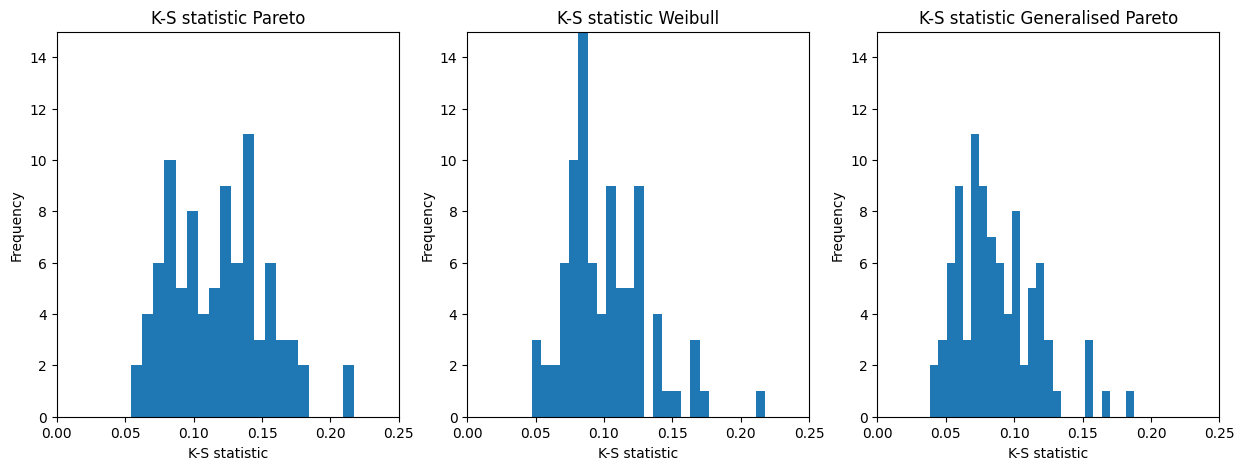

In [19]:
# Plot the K-S stats for the 3 distributions next to each other
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
x_lb, x_ub = 0.00, 0.25
y_lb, y_ub = 0, 15
n_bins = 25
ax[0].hist(test_statistics_df['ks_pareto_stat'], bins=n_bins)
ax[0].set_xlim(x_lb, x_ub)
ax[0].set_ylim(y_lb, y_ub)
ax[0].set_xlabel('K-S statistic')
ax[0].set_ylabel('Frequency')
ax[0].set_title('K-S statistic Pareto')
ax[1].hist(test_statistics_df['ks_weibull_stat'], bins=n_bins)
ax[1].set_xlim(x_lb, x_ub)
ax[1].set_ylim(y_lb, y_ub)
ax[1].set_xlabel('K-S statistic')
ax[1].set_ylabel('Frequency')
ax[1].set_title('K-S statistic Weibull')
ax[2].hist(test_statistics_df['ks_generalised_pareto_stat'], bins=n_bins)
ax[2].set_xlim(x_lb, x_ub)
ax[2].set_ylim(y_lb, y_ub)
ax[2].set_xlabel('K-S statistic')
ax[2].set_ylabel('Frequency')
ax[2].set_title('K-S statistic Generalised Pareto')
plt.show()


In [ ]:
# for latex
# Plot the K-S stats for the 3 distributions next to each other
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
x_lb, x_ub = 0.00, 0.25
y_lb, y_ub = 0, 15
n_bins = 25
ax[0].hist(test_statistics_df['ks_pareto_stat'], bins=n_bins)
ax[0].set_xlim(x_lb, x_ub)
ax[0].set_ylim(y_lb, y_ub)
ax[0].set_xlabel('K-S statistic')
ax[0].set_ylabel('Frequency')
ax[1].hist(test_statistics_df['ks_weibull_stat'], bins=n_bins)
ax[1].set_xlim(x_lb, x_ub)
ax[1].set_ylim(y_lb, y_ub)
ax[1].set_xlabel('K-S statistic')
ax[1].set_ylabel('Frequency')
ax[2].hist(test_statistics_df['ks_generalised_pareto_stat'], bins=n_bins)
ax[2].set_xlim(x_lb, x_ub)
ax[2].set_ylim(y_lb, y_ub)
ax[2].set_xlabel('K-S statistic')
ax[2].set_ylabel('Frequency')
plt.show()


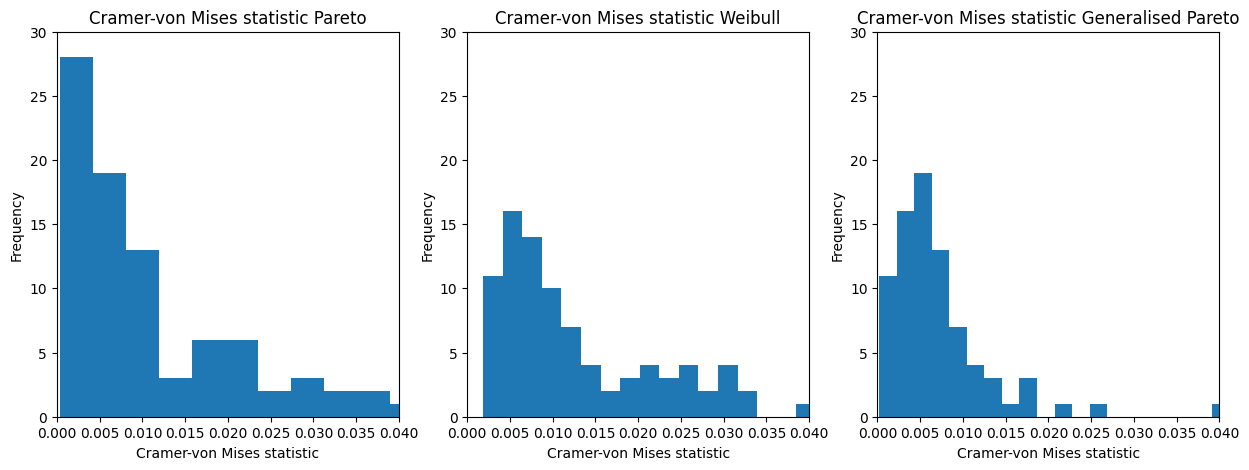

In [20]:
# Plot the Cramer-von Mises stats for the 3 distributions next to each other
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
x_lb, x_ub = 0.00, 0.04
y_lb, y_ub = 0, 30
n_bins = 40
ax[0].hist(test_statistics_df['cm_pareto_stat'], bins=n_bins)
ax[0].set_xlim(x_lb, x_ub)
ax[0].set_ylim(y_lb, y_ub)
ax[0].set_xlabel('Cramer-von Mises statistic')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Cramer-von Mises statistic Pareto')
ax[1].hist(test_statistics_df['cm_weibull_stat'], bins=n_bins)
ax[1].set_xlim(x_lb, x_ub)
ax[1].set_ylim(y_lb, y_ub)
ax[1].set_xlabel('Cramer-von Mises statistic')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Cramer-von Mises statistic Weibull')
ax[2].hist(test_statistics_df['cm_generalised_pareto_stat'], bins=n_bins)
ax[2].set_xlim(x_lb, x_ub)
ax[2].set_ylim(y_lb, y_ub)
ax[2].set_xlabel('Cramer-von Mises statistic')
ax[2].set_ylabel('Frequency')
ax[2].set_title('Cramer-von Mises statistic Generalised Pareto')
plt.show()


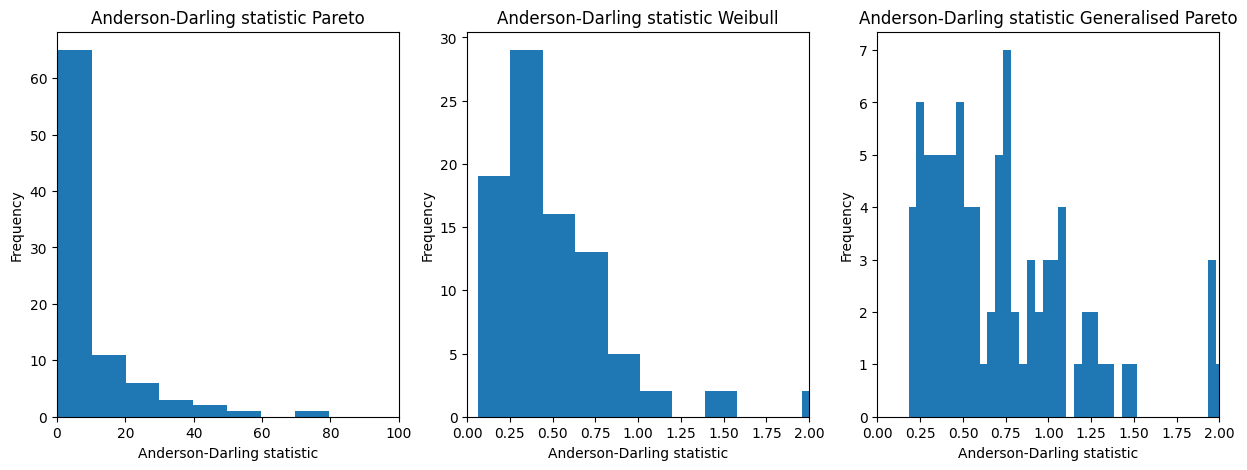

In [21]:
# Plot the Anderson-Darling stats for the 3 distributions next to each other
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
x_lb, x_ub = 0.00, 2.0
n_bins = 40
ax[0].hist(test_statistics_df['ad_pareto_stat'], bins=n_bins)
ax[0].set_xlim(0, 100)
ax[0].set_xlabel('Anderson-Darling statistic')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Anderson-Darling statistic Pareto')
ax[1].hist(test_statistics_df['ad_weibull_stat'], bins=n_bins)
ax[1].set_xlim(x_lb, x_ub)
ax[1].set_xlabel('Anderson-Darling statistic')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Anderson-Darling statistic Weibull')
ax[2].hist(test_statistics_df['ad_generalised_pareto_stat'], bins=n_bins)
ax[2].set_xlim(x_lb, x_ub)
ax[2].set_xlabel('Anderson-Darling statistic')
ax[2].set_ylabel('Frequency')
ax[2].set_title('Anderson-Darling statistic Generalised Pareto')
plt.show()


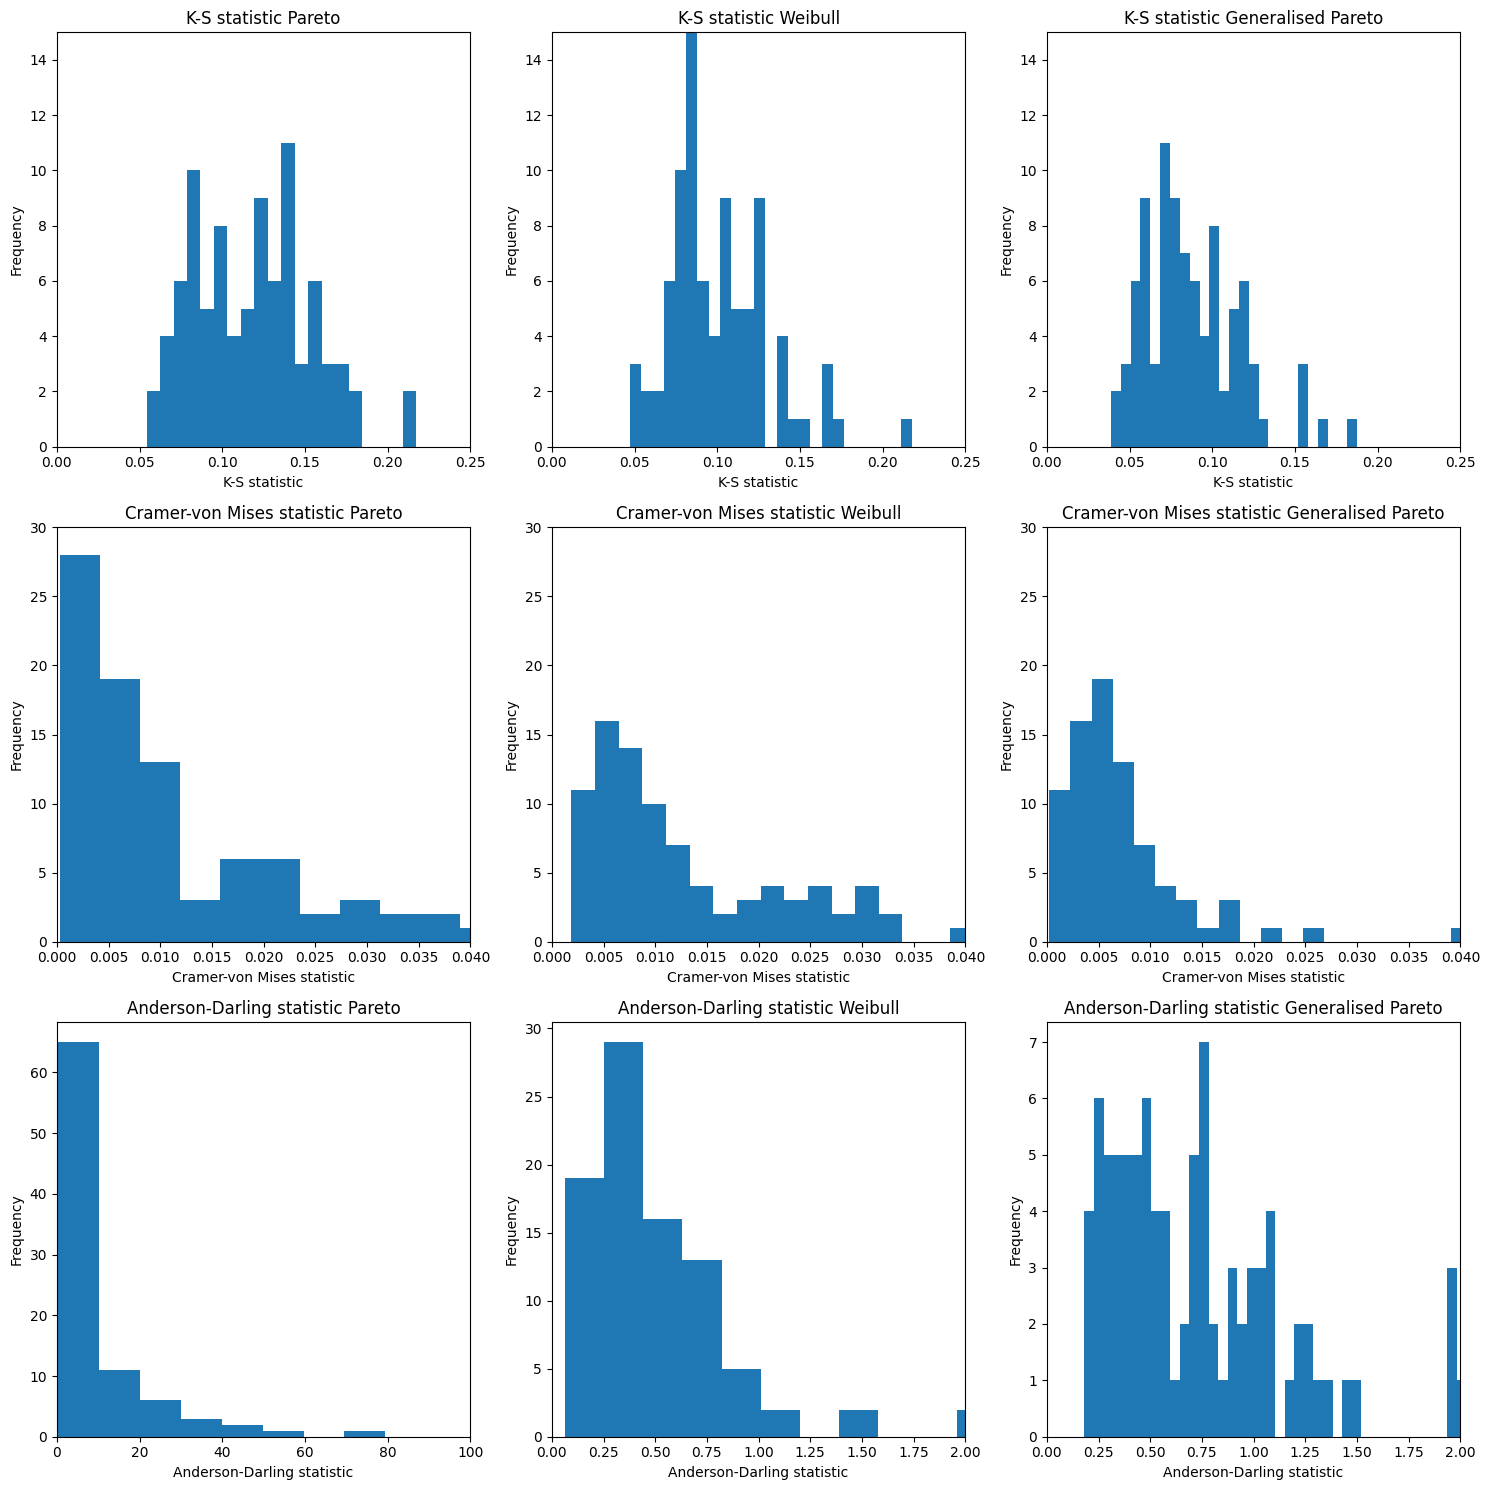

In [53]:
# Combined plot
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

# K-S statistics
x_lb, x_ub = 0.00, 0.25
y_lb, y_ub = 0, 15
n_bins = 25
ax[0, 0].hist(test_statistics_df['ks_pareto_stat'], bins=n_bins)
ax[0, 0].set_xlim(x_lb, x_ub)
ax[0, 0].set_ylim(y_lb, y_ub)
ax[0, 0].set_xlabel('K-S statistic')
ax[0, 0].set_ylabel('Frequency')
ax[0, 0].set_title('K-S statistic Pareto')

ax[0, 1].hist(test_statistics_df['ks_weibull_stat'], bins=n_bins)
ax[0, 1].set_xlim(x_lb, x_ub)
ax[0, 1].set_ylim(y_lb, y_ub)
ax[0, 1].set_xlabel('K-S statistic')
ax[0, 1].set_ylabel('Frequency')
ax[0, 1].set_title('K-S statistic Weibull')

ax[0, 2].hist(test_statistics_df['ks_generalised_pareto_stat'], bins=n_bins)
ax[0, 2].set_xlim(x_lb, x_ub)
ax[0, 2].set_ylim(y_lb, y_ub)
ax[0, 2].set_xlabel('K-S statistic')
ax[0, 2].set_ylabel('Frequency')
ax[0, 2].set_title('K-S statistic Generalised Pareto')

# Cramer-von Mises statistics
x_lb, x_ub = 0.00, 0.04
y_lb, y_ub = 0, 30
n_bins = 40
ax[1, 0].hist(test_statistics_df['cm_pareto_stat'], bins=n_bins)
ax[1, 0].set_xlim(x_lb, x_ub)
ax[1, 0].set_ylim(y_lb, y_ub)
ax[1, 0].set_xlabel('Cramer-von Mises statistic')
ax[1, 0].set_ylabel('Frequency')
ax[1, 0].set_title('Cramer-von Mises statistic Pareto')

ax[1, 1].hist(test_statistics_df['cm_weibull_stat'], bins=n_bins)
ax[1, 1].set_xlim(x_lb, x_ub)
ax[1, 1].set_ylim(y_lb, y_ub)
ax[1, 1].set_xlabel('Cramer-von Mises statistic')
ax[1, 1].set_ylabel('Frequency')
ax[1, 1].set_title('Cramer-von Mises statistic Weibull')

ax[1, 2].hist(test_statistics_df['cm_generalised_pareto_stat'], bins=n_bins)
ax[1, 2].set_xlim(x_lb, x_ub)
ax[1, 2].set_ylim(y_lb, y_ub)
ax[1, 2].set_xlabel('Cramer-von Mises statistic')
ax[1, 2].set_ylabel('Frequency')
ax[1, 2].set_title('Cramer-von Mises statistic Generalised Pareto')

# Anderson-Darling statistics
x_lb, x_ub = 0.00, 2.0
n_bins = 40
ax[2, 0].hist(test_statistics_df['ad_pareto_stat'], bins=n_bins)
ax[2, 0].set_xlim(0, 100)
ax[2, 0].set_xlabel('Anderson-Darling statistic')
ax[2, 0].set_ylabel('Frequency')
ax[2, 0].set_title('Anderson-Darling statistic Pareto')

ax[2, 1].hist(test_statistics_df['ad_weibull_stat'], bins=n_bins)
ax[2, 1].set_xlim(x_lb, x_ub)
ax[2, 1].set_xlabel('Anderson-Darling statistic')
ax[2, 1].set_ylabel('Frequency')
ax[2, 1].set_title('Anderson-Darling statistic Weibull')

ax[2, 2].hist(test_statistics_df['ad_generalised_pareto_stat'], bins=n_bins)
ax[2, 2].set_xlim(x_lb, x_ub)
ax[2, 2].set_xlabel('Anderson-Darling statistic')
ax[2, 2].set_ylabel('Frequency')
ax[2, 2].set_title('Anderson-Darling statistic Generalised Pareto')

plt.tight_layout()
plt.show()

In [22]:
# Make a df to show how what proportion of p_values of the KS, CM and AD tests are below 0.10, 0.05, 0.01
p_value_counts = {}
for test in ['ks', 'cm', 'ad']:
    for dist in ['pareto', 'weibull', 'generalised_pareto']:
        for p_value in [0.10, 0.05, 0.01]:
            key = f'{test}_{dist}_{p_value}'
            p_value_counts[key] = len(test_statistics_df[test_statistics_df[f'{test}_{dist}_p_value'] < p_value]) / len(test_statistics_df)
p_value_counts_df = pd.DataFrame(p_value_counts, index=[0]).T

In [23]:
p_value_counts

{'ks_pareto_0.1': 0.6333333333333333,
 'ks_pareto_0.05': 0.5222222222222223,
 'ks_pareto_0.01': 0.35555555555555557,
 'ks_weibull_0.1': 0.4888888888888889,
 'ks_weibull_0.05': 0.35555555555555557,
 'ks_weibull_0.01': 0.2222222222222222,
 'ks_generalised_pareto_0.1': 0.4,
 'ks_generalised_pareto_0.05': 0.23333333333333334,
 'ks_generalised_pareto_0.01': 0.06666666666666667,
 'cm_pareto_0.1': 0.03333333333333333,
 'cm_pareto_0.05': 0.0,
 'cm_pareto_0.01': 0.0,
 'cm_weibull_0.1': 0.14444444444444443,
 'cm_weibull_0.05': 0.07777777777777778,
 'cm_weibull_0.01': 0.05555555555555555,
 'cm_generalised_pareto_0.1': 0.15555555555555556,
 'cm_generalised_pareto_0.05': 0.07777777777777778,
 'cm_generalised_pareto_0.01': 0.011111111111111112,
 'ad_pareto_0.1': 0.0,
 'ad_pareto_0.05': 0.0,
 'ad_pareto_0.01': 0.0,
 'ad_weibull_0.1': 0.03333333333333333,
 'ad_weibull_0.05': 0.011111111111111112,
 'ad_weibull_0.01': 0.0,
 'ad_generalised_pareto_0.1': 0.0,
 'ad_generalised_pareto_0.05': 0.0,
 'ad_gener

In [24]:
test_statistics_df

ks_pareto_stat  ks_pareto_p_value  ks_weibull_stat  \
2001-01-01 U.S.                 0.085851       1.289449e-01         0.076923   
2002-01-01 U.S.                 0.085227       1.463347e-01         0.085227   
2003-01-01 U.S.                 0.084848       1.754296e-01         0.115048   
2004-01-01 U.S.                 0.067143       2.845460e-01         0.067821   
2005-01-01 U.S.                 0.104447       6.355885e-03         0.099617   
...                                  ...                ...              ...   
2023-01-01 China                0.074891       3.619577e-03         0.053476   
           Scandinavia          0.109947       3.748281e-01         0.118987   
           U.S.                 0.143020       1.714204e-13         0.089763   
           Asian Islands        0.137226       5.062299e-02         0.086606   
           Russia               0.071464       6.365528e-01         0.083242   

                          ks_weibull_p_value  ks_generalised_pareto_stat  \
2001-01-01 U.S.                     0.220128                    0.076923   
2002-01-01 U.S.                     0.146335                    0.085227   
2003-01-01 U.S.                     0.023313                    0.098558   
2004-01-01 U.S.                     0.273718                    0.061611   
2005-01-01 U.S.                     0.010666                    0.099617   
...                                      ...                         ...   
2023-01-01 China                    0.079282                    0.053476   
           Scandinavia              0.284353                    0.121857   
           U.S.                     0.000014                    0.053793   
           Asian Islands            0.449193                    0.086026   
           Russia                   0.443143                    0.094432   

                          ks_generalised_pareto_p_value  cm_pareto_stat  \
2001-01-01 U.S.                                0.220128        0.007007   
2002-01-01 U.S.                                0.146335        0.001192   
2003-01-01 U.S.                                0.075704        0.003736   
2004-01-01 U.S.                                0.384168        0.002893   
2005-01-01 U.S.                                0.010666        0.000799   
...                                                 ...             ...   
2023-01-01 China                               0.079282        0.004794   
           Scandinavia                         0.259157        0.006190   
           U.S.                                0.028183        0.008925   
           Asian Islands                       0.457686        0.009331   
           Russia                              0.293023        0.008566   

                          cm_pareto_p_value  cm_weibull_stat  \
2001-01-01 U.S.                       0.408         0.007797   
2002-01-01 U.S.                       0.927         0.010345   
2003-01-01 U.S.                       0.583         0.008649   
2004-01-01 U.S.                       0.591         0.013504   
2005-01-01 U.S.                       0.916         0.012231   
...                                     ...              ...   
2023-01-01 China                      0.260         0.004300   
           Scandinavia                0.706         0.040215   
           U.S.                       0.891         0.028920   
           Asian Islands              0.429         0.006586   
           Russia                     0.708         0.018581   

                          cm_weibull_p_value  cm_generalised_pareto_stat  \
2001-01-01 U.S.                        0.410                    0.012627   
2002-01-01 U.S.                        0.248                    0.007226   
2003-01-01 U.S.                        0.320                    0.013426   
2004-01-01 U.S.                        0.072                    0.008904   
2005-01-01 U.S.                        0.054                    0.005401   
...                       

In [25]:
ks_pareto_pvals = test_statistics_df['ks_pareto_p_value']
ks_weibull_pvals = test_statistics_df['ks_weibull_p_value']
ks_generalised_pareto_pvals = test_statistics_df['ks_generalised_pareto_p_value']
cm_pareto_pvals = test_statistics_df['cm_pareto_p_value']
cm_weibull_pvals = test_statistics_df['cm_weibull_p_value']
cm_generalised_pareto_pvals = test_statistics_df['cm_generalised_pareto_p_value']
ad_pareto_pvals = test_statistics_df['ad_pareto_p_value']
ad_weibull_pvals = test_statistics_df['ad_weibull_p_value']
ad_generalised_pareto_pvals = test_statistics_df['ad_generalised_pareto_p_value']

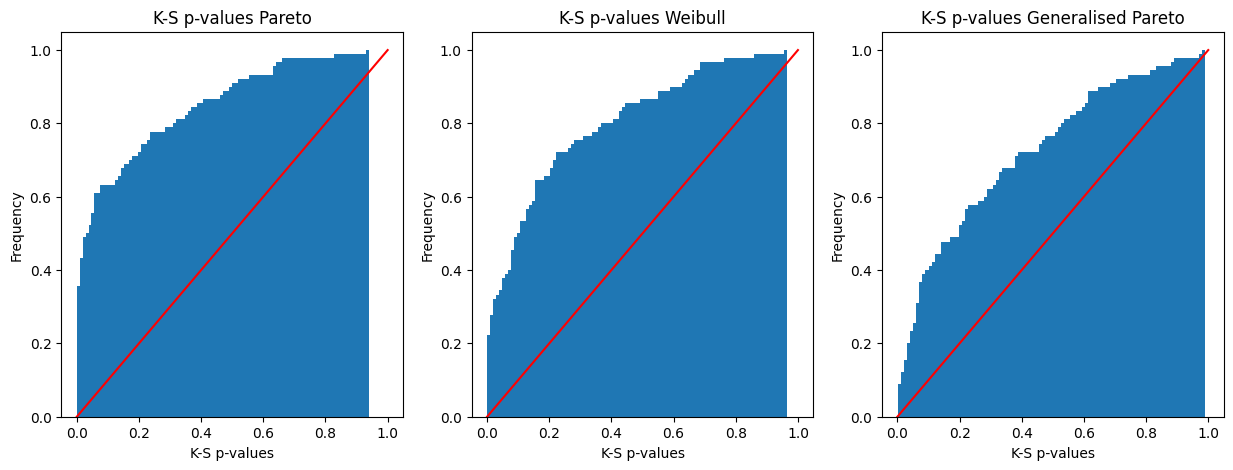

In [26]:
# Plot the cumulative distribution of the p-values
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
n_bins = 100
ax[0].hist(ks_pareto_pvals, bins=n_bins, cumulative=True, density=True)
x = np.linspace(0, 1, 100)
ax[0].plot(x, x, color='red')
ax[0].set_xlabel('K-S p-values')
ax[0].set_ylabel('Frequency')
ax[0].set_title('K-S p-values Pareto')
ax[1].hist(ks_weibull_pvals, bins=n_bins, cumulative=True, density=True)
x = np.linspace(0, 1, 100)
ax[1].plot(x, x, color='red')
ax[1].set_xlabel('K-S p-values')
ax[1].set_ylabel('Frequency')
ax[1].set_title('K-S p-values Weibull')
ax[2].hist(ks_generalised_pareto_pvals, bins=n_bins, cumulative=True, density=True)
x = np.linspace(0, 1, 100)
ax[2].plot(x, x, color='red')
ax[2].set_xlabel('K-S p-values')
ax[2].set_ylabel('Frequency')
ax[2].set_title('K-S p-values Generalised Pareto')
plt.show()

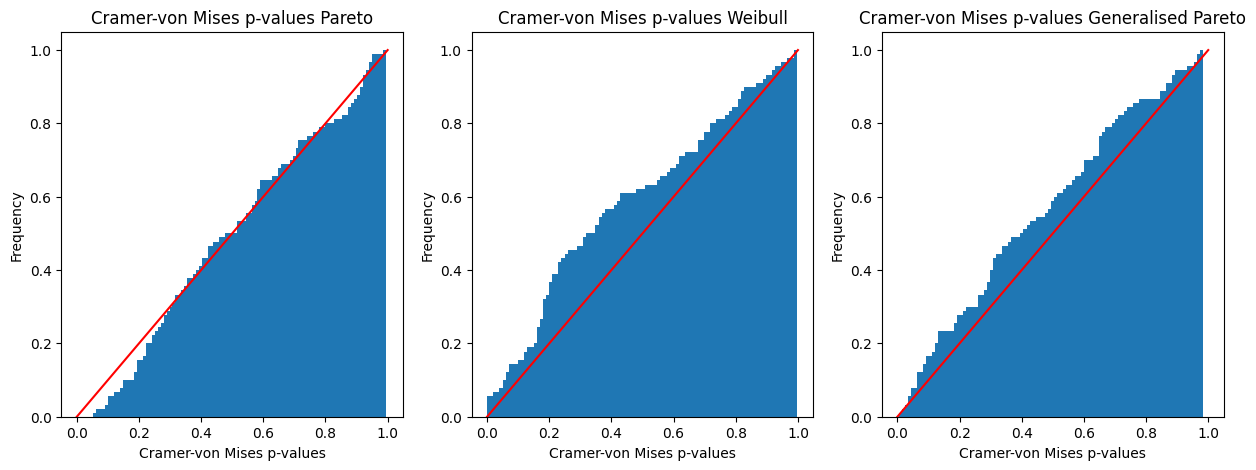

In [27]:
# Plot the cumulative distribution of the p-values for the Cramer-von Mises test
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
n_bins = 100
ax[0].hist(cm_pareto_pvals, bins=n_bins, cumulative=True, density=True)
x = np.linspace(0, 1, 100)
ax[0].plot(x, x, color='red')
ax[0].set_xlabel('Cramer-von Mises p-values')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Cramer-von Mises p-values Pareto')
ax[1].hist(cm_weibull_pvals, bins=n_bins, cumulative=True, density=True)
x = np.linspace(0, 1, 100)
ax[1].plot(x, x, color='red')
ax[1].set_xlabel('Cramer-von Mises p-values')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Cramer-von Mises p-values Weibull')
ax[2].hist(cm_generalised_pareto_pvals, bins=n_bins, cumulative=True, density=True)
x = np.linspace(0, 1, 100)
ax[2].plot(x, x, color='red')
ax[2].set_xlabel('Cramer-von Mises p-values')
ax[2].set_ylabel('Frequency')
ax[2].set_title('Cramer-von Mises p-values Generalised Pareto')
plt.show()

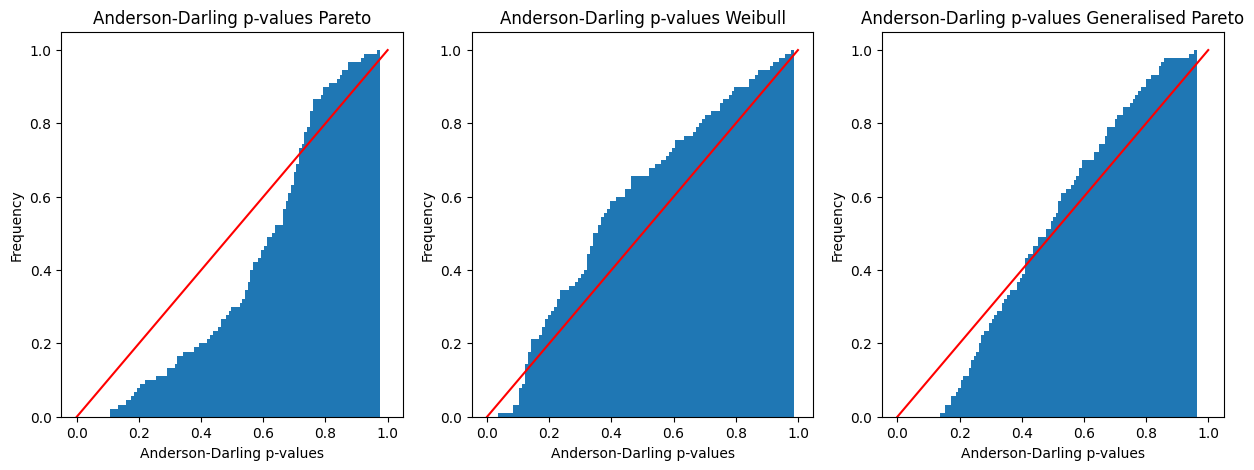

In [28]:
# Plot the cumulative distribution of the p-values for the Anderson-Darling test
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
n_bins = 100
ax[0].hist(ad_pareto_pvals, bins=n_bins, cumulative=True, density=True)
x = np.linspace(0, 1, 100)
ax[0].plot(x, x, color='red')
ax[0].set_xlabel('Anderson-Darling p-values')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Anderson-Darling p-values Pareto')
ax[1].hist(ad_weibull_pvals, bins=n_bins, cumulative=True, density=True)
x = np.linspace(0, 1, 100)
ax[1].plot(x, x, color='red')
ax[1].set_xlabel('Anderson-Darling p-values')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Anderson-Darling p-values Weibull')
ax[2].hist(ad_generalised_pareto_pvals, bins=n_bins, cumulative=True, density=True)
x = np.linspace(0, 1, 100)
ax[2].plot(x, x, color='red')
ax[2].set_xlabel('Anderson-Darling p-values')
ax[2].set_ylabel('Frequency')
ax[2].set_title('Anderson-Darling p-values Generalised Pareto')
plt.show()

### Mean Wealth Predictions

In [60]:
mean_wealth = {}
for ind in parameter_estimates_df.index:
    info = parameter_estimates_df.loc[ind]
    mean_wealth_data = info['mean_wealth']
    mean_wealth_pareto = Pareto(alpha=info['alpha_pareto']).mean()
    mean_wealth_weibull = Weibull(gamma=info['gamma_weibull'], alpha=info['alpha_weibull']).mean()
    mean_wealth_generalised_pareto = GeneralisedPareto(
        gamma=info['gamma_generalised_pareto'], sigma=info['sigma_generalised_pareto']
    ).mean()
    resid_pareto = mean_wealth_data - mean_wealth_pareto
    resid_weibull = mean_wealth_data - mean_wealth_weibull
    resid_generalised_pareto = mean_wealth_data - mean_wealth_generalised_pareto
    mean_wealth[ind] = {
        'data': mean_wealth_data,
        'pareto': mean_wealth_pareto,
        'weibull': mean_wealth_weibull,
        'generalised_pareto': mean_wealth_generalised_pareto,
        'resid_pareto': resid_pareto,
        'resid_weibull': resid_weibull,
        'resid_generalised_pareto': resid_generalised_pareto
    }
mean_wealth_df = pd.DataFrame(mean_wealth).T

In [61]:
# Filter on 2018
mean_wealth_df[mean_wealth_df.index.get_level_values(0) == "2018"]

data     pareto   weibull  generalised_pareto  \
2018-01-01 Southeast Asia  3.327273   9.425718  3.495199            3.876007   
           India           3.698319  24.113263  3.876737            4.279600   
           Germany         4.704878        inf  5.510474            5.933079   
           China           3.310023   5.001955  3.090201            3.235063   
           U.S.            5.287884        inf  5.421926            5.625746   
           Asian Islands   3.167164   6.182593  3.202441            3.557621   
           Russia          4.052475  21.347830  4.042993            3.970536   

                           resid_pareto  resid_weibull  \
2018-01-01 Southeast Asia     -6.098446      -0.167926   
           India             -20.414943      -0.178418   
           Germany                 -inf      -0.805596   
           China              -1.691932       0.219822   
           U.S.                    -inf      -0.134042   
           Asian Islands      -3.015429      -0.035277   
           Russia            -17.295355       0.009483   

                           resid_generalised_pareto  
2018-01-01 Southeast Asia                 -0.548734  
           India                          -0.581281  
           Germany                        -1.228201  
           China                           0.074960  
           U.S.                           -0.337862  
           Asian Islands                  -0.390457  
           Russia                          0.081939

In [70]:
# For each year, find the MSE of the mean wealth estimates
MSE = {}
for year in years:
    data = mean_wealth_df[mean_wealth_df.index.get_level_values(0) == year]
    MSE[year] = {
        #'MSE_pareto': ((data['resid_pareto'])**2).mean(),
        'MSE_weibull': ((data['resid_weibull'])**2).mean(),
        'MSE_generalised_pareto': ((data['resid_generalised_pareto'])**2).mean()
    }
MSE_df = pd.DataFrame(MSE).T
MSE_df.dropna(inplace=True)

In [71]:
# Mean absolute error
MAE = {}
for year in years:
    data = mean_wealth_df[mean_wealth_df.index.get_level_values(0) == year]
    MAE[year] = {
        #'MAE_pareto': np.abs(data['resid_pareto']).mean(),
        'MAE_weibull': np.abs(data['resid_weibull']).mean(),
        'MAE_generalised_pareto': np.abs(data['resid_generalised_pareto']).mean()
    }
MAE_df = pd.DataFrame(MAE).T
MAE_df.dropna(inplace=True)

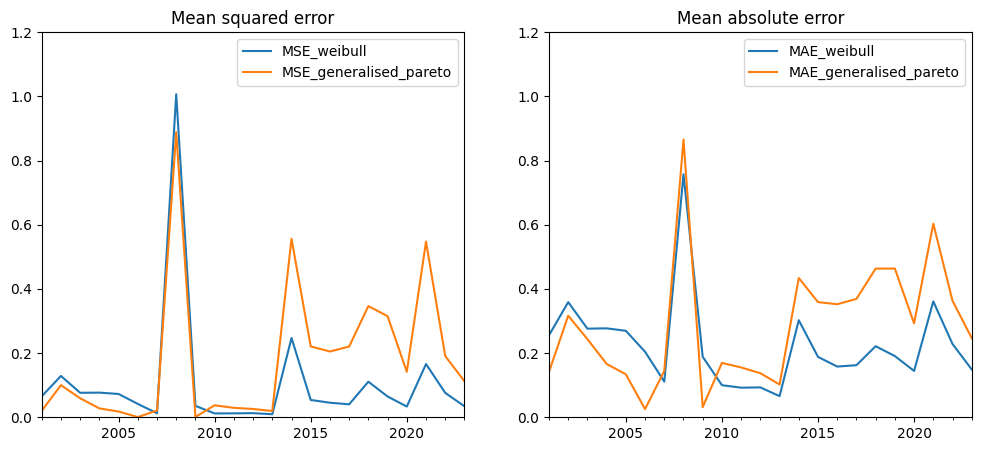

In [72]:
# plot the MSEs and MAEs over time
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
MSE_df.plot(ax=ax[0], title='Mean squared error')
MAE_df.plot(ax=ax[1], title='Mean absolute error')
ax[0].set_ylim(0, 1.2)
ax[1].set_ylim(0, 1.2)
plt.show()


## Conclusion

- Generally, both Weibull and GPD fit the data better
- The GPD fit is slightly better (in terms of distribution)
- The Weibull distribution yields better mean wealth predictions than GPD